# The Business Problem

### The objective 

- The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully, the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.

### The data
- The data set contains socio-demographic and firmographic features about 2.240 customers who were contacted. Additionally, it contains a flag for those customers who responded the campaign, by buying the product.

- AcceptedCmpl - 1 if costumer accepted the offer in the 1st campaign. 0 otherwise

- AcceptedCmp2 - 1 if costumer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if costumer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if costumer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if costumer accepted the offer in the 5th campaign. 0 otherwise
- Response (target) - 1 if costumer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if costumer complained in the last 2 years
- DtCustomer - date of customer's enrollment with the company 
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- Mnt FishProducts - amount spent on fish products in the last 2 years
- Mnt Meat Products - amount spent on meat products in the last 2 years
- Mnt Fruits - amount spent on fruits in the last 2 years
- MntSweet Products - amount spent on sweet products in the last 2 years
- Mnt Wines - amount spent on wines in the last 2 years 
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDeals Purchases - number of purchases made with discount
- NumCatalog Purchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company's web site
- NumWebVisits Month - number of visits to company's web site in the last month
- Recency - number of days since the last purchase

# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inflection
import datetime
import math
import warnings




from IPython.display import display, HTML
from datetime import datetime

from sklearn.model_selection import train_test_split

# 0.1 - Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    
    #plt.style.use('bmh')
    #plt.rcParams['figure.figsize'] = [25, 12]
    #plt.rcParams['font.size'] = 24
    
    display(HTML("<style>.container { width:97% !important; }</style>"))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set


# 0.2 - Load Data

In [3]:
jupyter_settings()
warnings.filterwarnings('ignore')

In [4]:
df_raw = pd.read_csv('C:/Users/anderson.bonifacio_i/Desktop/Dados/case_food_delivery/case_food_delivery/data/raw/data.csv')
df_raw.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# 0.3 - Split Data in Train, Validation and Test

In [5]:
X = df_raw.drop(['Response'], axis=1)
y = df_raw['Response'].copy()


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Split train and validation

X_train, X_val, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

df = pd.concat( [ X_train, y_train], axis=1)

# 1.0 - Data Description

In [6]:
df1 = df.copy()

## 1.1 - Rename Columns

In [7]:
cols = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols))

df1.columns = cols_new

## 1.2 - Data Dimension

In [ ]:
df1.shape

## 1.3 - Data Types

In [ ]:
df1.info()

## 1.4 - Change Types

In [8]:
# change dt_customer type to datetime

df1['dt_customer'] = pd.to_datetime(df1['dt_customer'])

## 1.5 - Check NA

In [9]:
df1.isna().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   17
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

## 1.5.1 - Fillout NA

In [10]:
df1['income'].fillna(df1['income'].mean(), inplace=True)

## 1.6 - Basic Statistics

In [11]:
num_attributes = df1.select_dtypes(include = ['int32', 'int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32', 'int64', 'datetime64[ns]', 'float64'])

## 1.6.1 - Numerical Attributes

In [12]:
# Central tendency - mean, median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T


# Dispersion - std, min, max, range

d1 = pd.DataFrame(num_attributes.apply(np.std)).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(np.min)).T # Mínimo
d3 = pd.DataFrame(num_attributes.apply(np.max)).T # Máximo
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

m = pd.concat( [d2, d3, d4, d1, ct1, ct2]).T.reset_index()

m.columns = ([ 'features', 'min', 'max', 'range', 'std', 'media', 'median'])

m

,features,min,max,range,std,media,median
0,id,0.0,11181.0,11181.0,3268.548022,5566.443824,5424.0
1,year_birth,1899.0,1996.0,97.0,11.924039,1968.854850,1970.0
2,income,2447.0,666666.0,664219.0,27315.625773,52197.555791,51529.0
3,kidhome,0.0,2.0,2.0,0.547194,0.452896,0.0
4,teenhome,0.0,2.0,2.0,0.541539,0.501047,0.0
5,recency,0.0,99.0,99.0,28.574795,48.422191,49.0
6,mnt_wines,0.0,1493.0,1493.0,336.643566,296.863922,163.0
7,mnt_fruits,0.0,199.0,199.0,40.331257,26.803210,8.0
8,mnt_meat_products,0.0,1725.0,1725.0,236.383035,170.872296,66.0
9,mnt_fish_products,0.0,259.0,259.0,54.268014,37.364271,12.0


# 2.0 - Feature Engineering

In [13]:
df2 = df1.copy()

## 2.1 - Hypothesis List

**1- Clientes com maior renda tem maior tendência a aceitar a campanha**

**2- Clientes com mais filhos em casa tem maior tendência a aceitar a campanha**

**3- Clientes com recência menor possuem maior tendência a aceitar a campanha**

**4- Clientes com maior consumo de produtos gold tem maior tendência a aceitar a campanha**

**5- Clientes que aceitaram campanhas anteriores tem maior tendência a aceitar a campanha**

**6- Clientes com maior consumo de frutas tem menor tendência a aceitar a campanha**

**7- Clientes com mais visitas no site tem maior tendência a aceitar a campanha**

**8- Clientes com mais compras na web tem maior tendência a aceitar a campanha**

**9- Clientes mais velhos tem menor tendência a aceitar a campanha**

**10- Clientes com marital_status igual a Single tem maior tendência a aceitar a campanha**

**11- Clientes maior nível de escolaridade tem maior tendência a aceitar a campanha**

**12- Clientes com mais tempo dentro da compania tem maior tendência a aceitar a campanha**

## 2.2 Feature Engineering

In [14]:
# Criar coluna idade

data_atual = datetime.now()

df2['age'] = data_atual.year - df2['year_birth']
df2.drop(['year_birth'],axis=1, inplace=True)

# Criar a coluna customer_time com o tempo e meses que cada pessoa é cliente da compania

df2['customer_time'] = (((data_atual - df2['dt_customer']).dt.days) / 30).astype(int)
df2.drop(['dt_customer'], axis=1, inplace=True)

# Alterando valores na coluna marital_status
df2['marital_status'] = df2['marital_status'].apply(lambda x: 'Single' if x == 'Alone' else 'Single' if x == 'YOLO' else x)

## 2.3 - Variable Filtering

In [15]:
# Retirando colunas que por não ter variação não vão ajudar a explicar o fenômeno

cols_drop = ['z_cost_contact', 'z_revenue' ]

df2.drop(cols_drop, axis=1, inplace=True)

# 3.0 - Exploratory Data Analysis

In [16]:
df3 = df2.copy()

## 3.1 - Univariate Analysis

### 3.1.1 - Response Variable

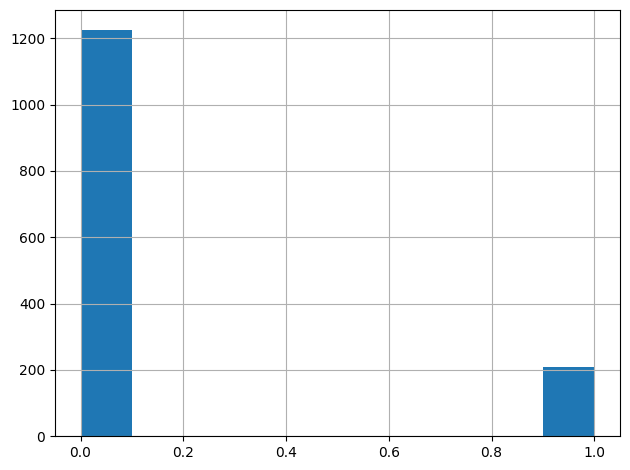

In [17]:
df3['response'].hist()
plt.tight_layout();

### 3.1.2 - Numerical Variables

In [18]:
num_attributes = df3.select_dtypes(include = ['int32', 'int64', 'float64'])
cat_attributes = df3.select_dtypes(exclude = ['int32', 'int64', 'datetime64[ns]', 'float64'])

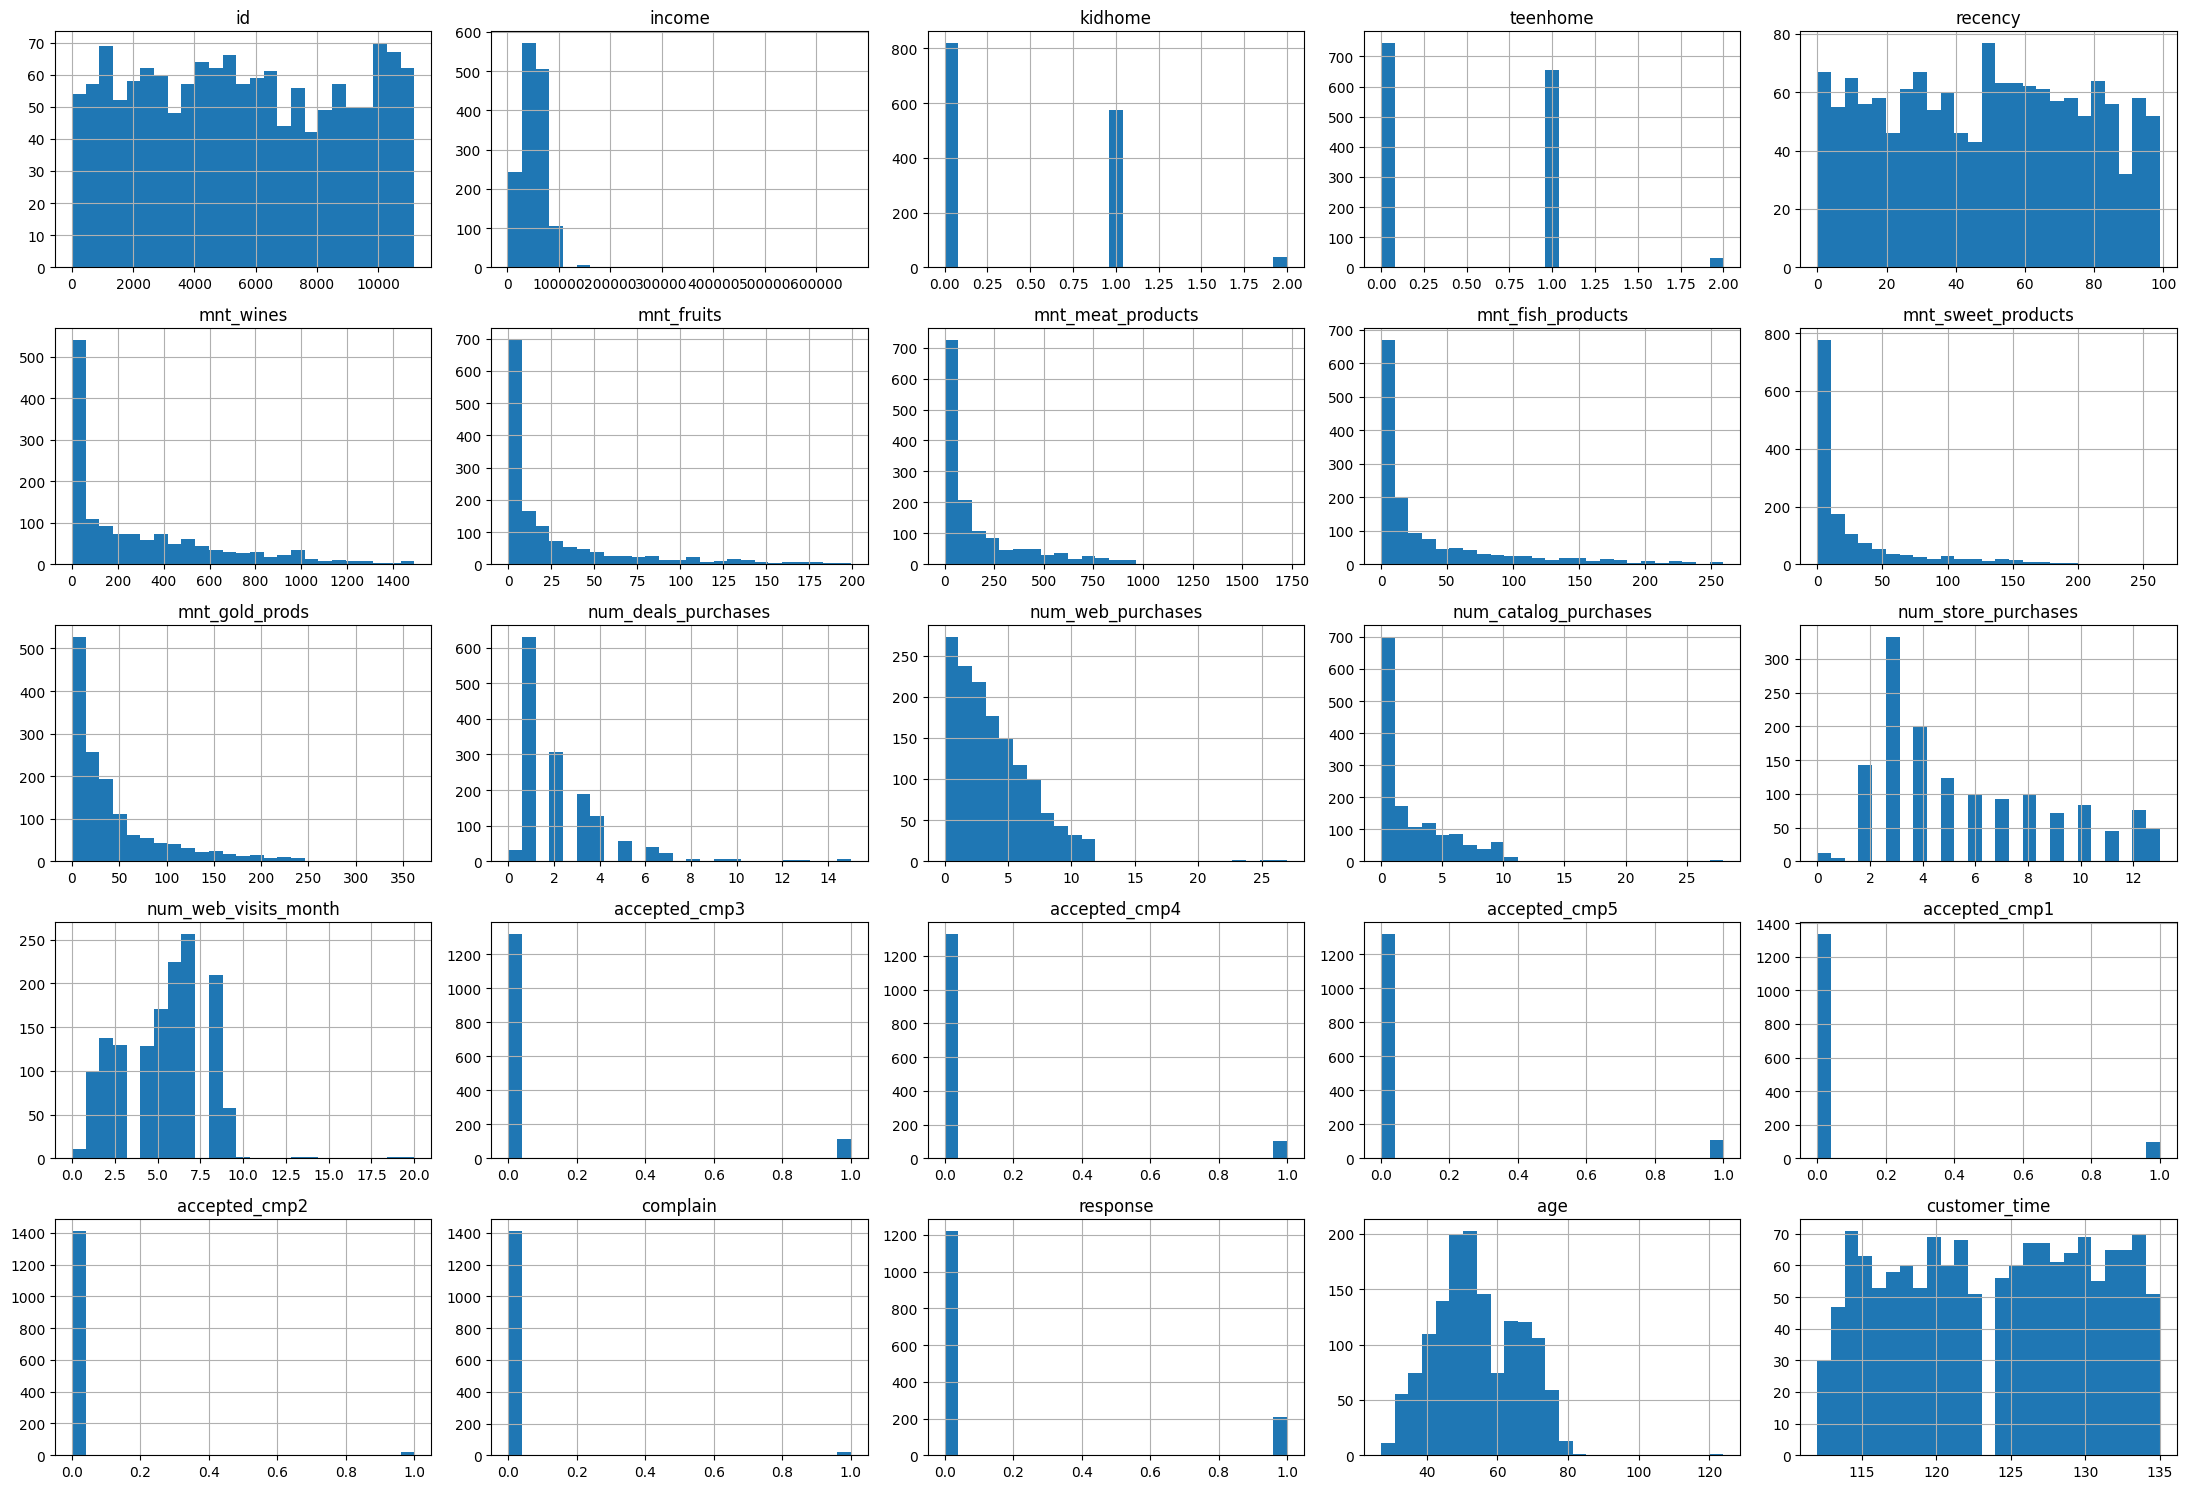

In [19]:
num_attributes.hist(bins=25, figsize=(22,15))
plt.tight_layout();

### 3.1.3 - Categorical Variable

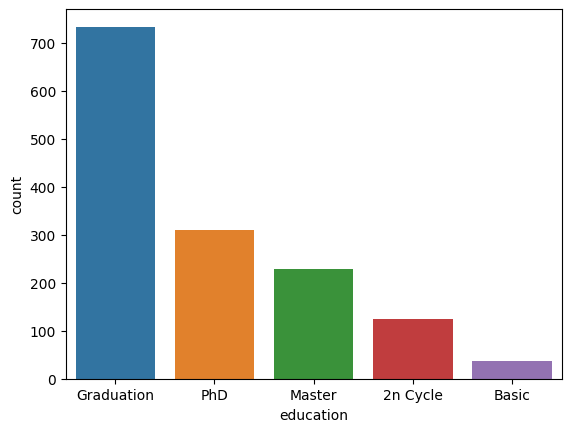

In [20]:
sns.countplot( data=df3, x='education');

<Axes: xlabel='marital_status', ylabel='count'>

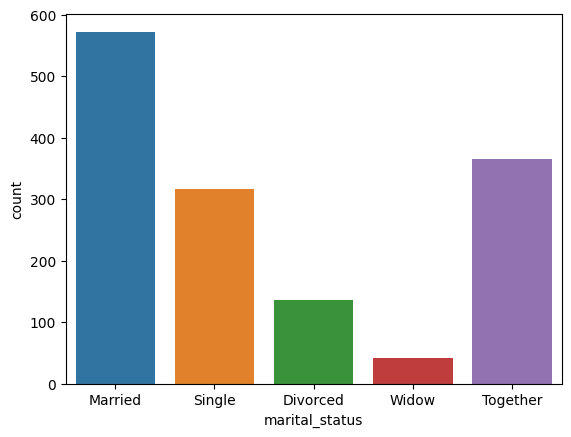

In [21]:
sns.countplot(data=df3, x='marital_status')

## 3.2 - Bivariate Analysis

### **Hipótese 1- Clientes com renda mais alta tem maior tendência a aceitar a campanha**

**Verdadeira:** Existe uma correlação positiva entre a renda e os aceites na campanha.



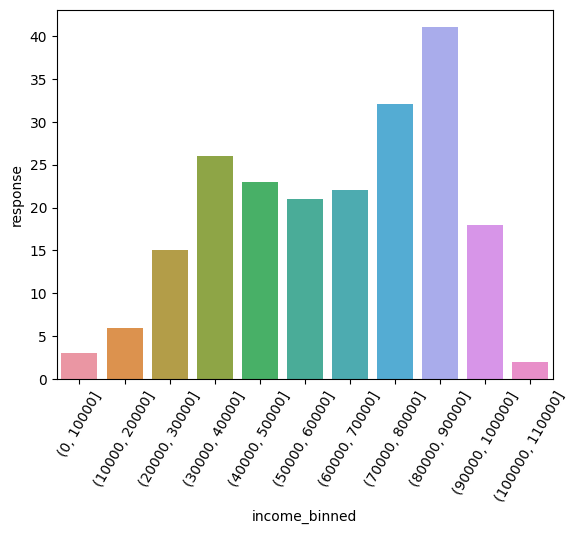

In [22]:
h1 = df3[['income', 'response']].groupby('income').sum().reset_index()

bins = list(np.arange(0, 120000, 10000))
h1['income_binned'] = pd.cut(h1['income'], bins=bins) 
h1_1 = h1[['income_binned', 'response']].groupby('income_binned').sum().reset_index()
sns.barplot(x= 'income_binned', y='response', data=h1_1)
plt.xticks(rotation=60);

#sns.displot(data=h1, x='income' );

### **Hipótese 2- Clientes com mais filhos em casa tem maior tendência a aceitar a campanha**

**Falsa:** Clientes com mais filhos em casa sem adolescentes ou crianças tendem a aceitar menos a campanha.

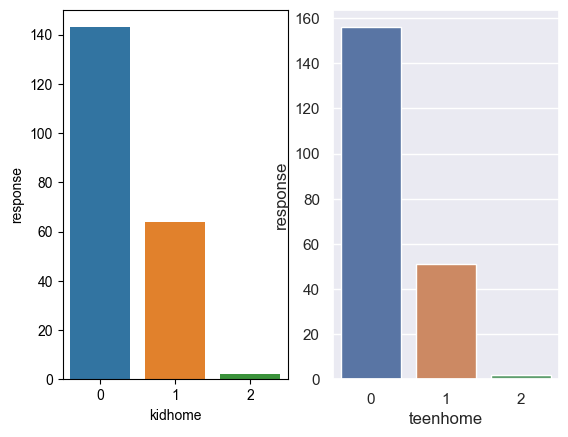

In [23]:
plt.subplot(1, 2, 1)
aux2 = df3[['kidhome', 'response']].groupby(['kidhome']).sum().reset_index()
sns.barplot(data=aux2, x='kidhome', y='response');
sns.set(rc={'figure.figsize':(7.8,8.27)})

plt.subplot(1, 2, 2)
aux2_1 = df3[['teenhome', 'response']].groupby('teenhome').sum().reset_index()
sns.barplot(data=aux2_1, x='teenhome', y='response');
sns.set(rc={'figure.figsize':(7.8,8.27)})


### **Hipótese 3- Clientes com recência menor possuem maior tendência a aceitar a campanha**

**Verdadeira:** Clientes com compras recentes tendem a aceitar mais a campanha.

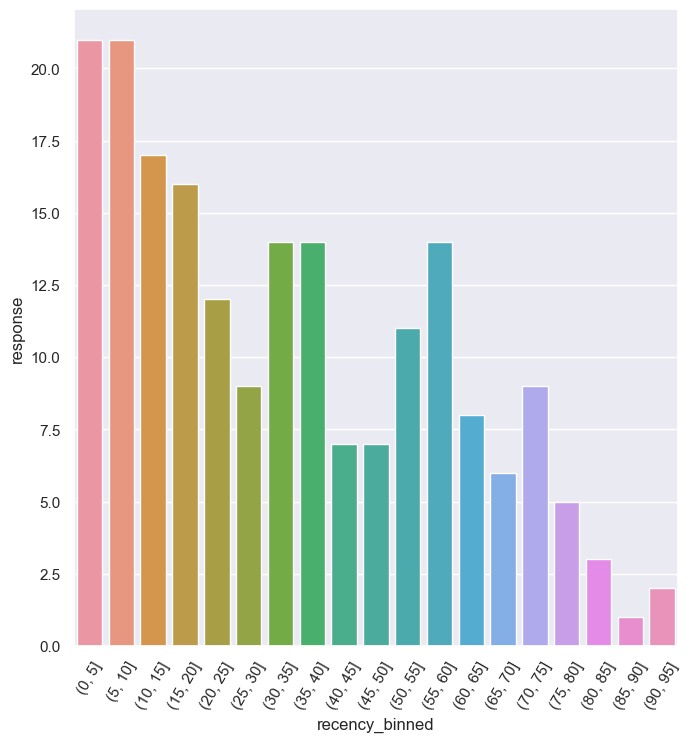

In [24]:
aux3 = df3[['recency', 'response']].groupby('recency').sum().reset_index()

bins = list(np.arange(0, 100, 5))
aux3['recency_binned'] = pd.cut(aux3['recency'], bins=bins) 
h3_1 = aux3[['recency_binned', 'response']].groupby('recency_binned').sum().reset_index()
sns.barplot(x= 'recency_binned', y='response', data=h3_1)
plt.xticks(rotation=60);

### **Hipótese 4- Clientes com maior consumo de produtos gold tem maior tendência a aceitar a campanha**

**Falsa:** O aumento no aceite das campanhas é percebido apenas até certo ponto, após isso a correlação é fraca.

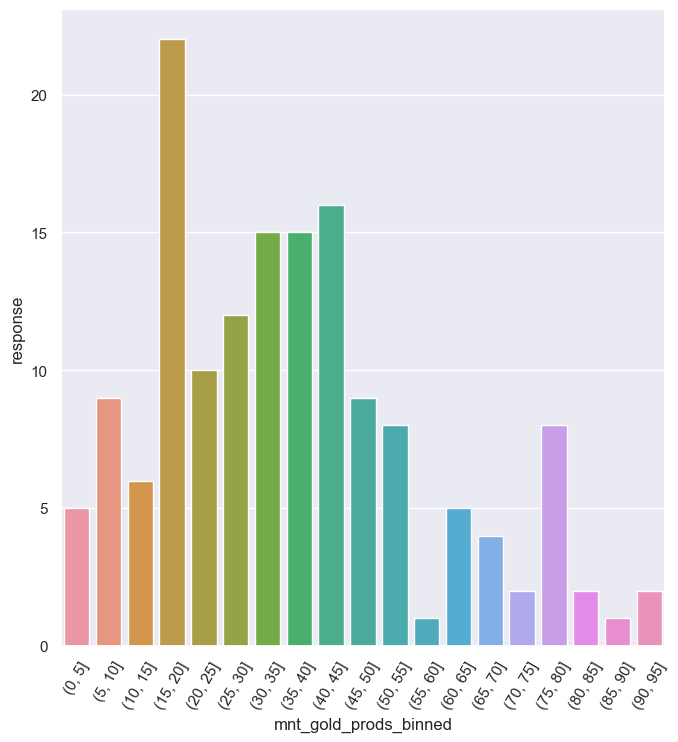

In [25]:
aux4 = df3[['mnt_gold_prods', 'response']].groupby('mnt_gold_prods').sum().reset_index()

bins = list(np.arange(0, 100, 5))
aux4['mnt_gold_prods_binned'] = pd.cut(aux4['mnt_gold_prods'], bins=bins) 
h4_1 = aux4[['mnt_gold_prods_binned', 'response']].groupby('mnt_gold_prods_binned').sum().reset_index()
sns.barplot(x= 'mnt_gold_prods_binned', y='response', data=h4_1)
plt.xticks(rotation=60);

### **Hipótese 5- Clientes que aceitaram campanhas anteriores tem maior tendência a aceitar a campanha**

**Falsa:** Clientes que aceitaram campanhas anteriores não necessariamente tem mais tendência a aceitar a campanha seguinte.


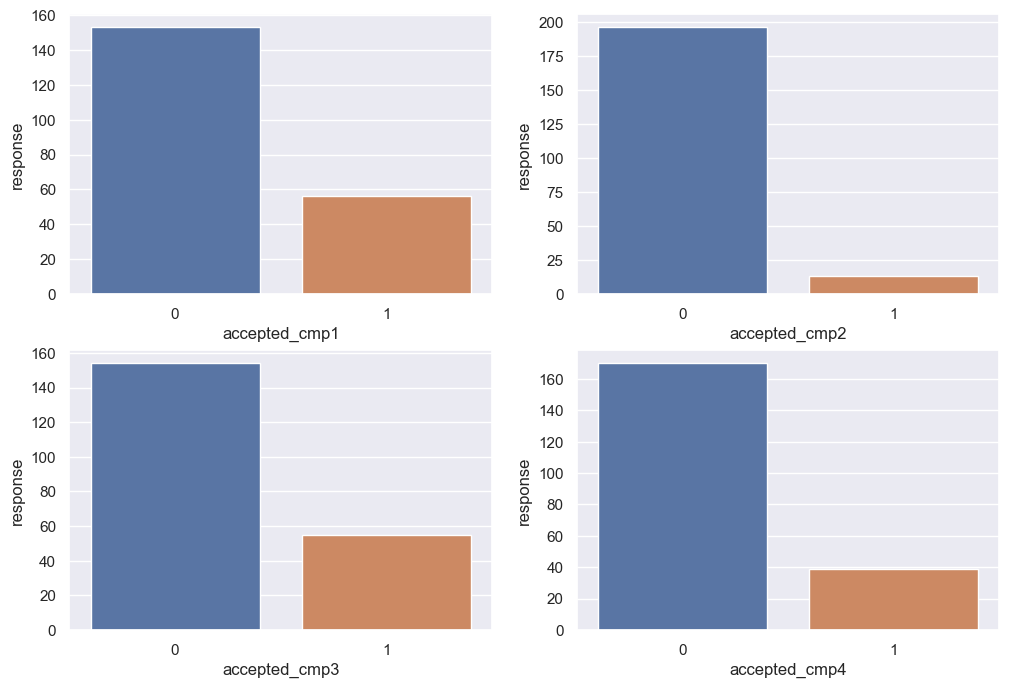

In [43]:
plt.subplot(2, 2, 1)
camp1 = df3[['accepted_cmp1', 'response']].groupby('accepted_cmp1').sum().reset_index()
sns.barplot(data=camp1, x='accepted_cmp1', y='response')
sns.set(rc={'figure.figsize':(12,8)});

plt.subplot(2, 2, 2)
camp1 = df3[['accepted_cmp2', 'response']].groupby('accepted_cmp2').sum().reset_index()
sns.barplot(data=camp1, x='accepted_cmp2', y='response')
sns.set(rc={'figure.figsize':(12,8)});

plt.subplot(2, 2, 3)
camp1 = df3[['accepted_cmp3', 'response']].groupby('accepted_cmp3').sum().reset_index()
sns.barplot(data=camp1, x='accepted_cmp3', y='response')
sns.set(rc={'figure.figsize':(12,8)});

plt.subplot(2, 2, 4)
camp1 = df3[['accepted_cmp4', 'response']].groupby('accepted_cmp4').sum().reset_index()
sns.barplot(data=camp1, x='accepted_cmp4', y='response')
sns.set(rc={'figure.figsize':(12,8)});





### **Hipótese 6 - Clientes com maior consumo de frutas tem menor tendência a aceitar a campanha**

**Verdadeira:** Existe uma correlação fraca e negativa da quantidade de frutas e o aceite da campanha.

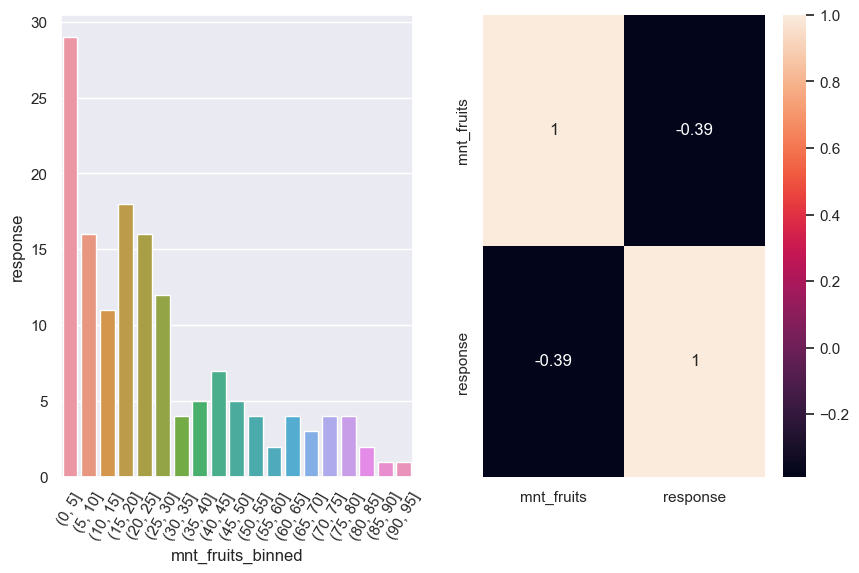

In [55]:
aux6 = df3[['mnt_fruits', 'response']].groupby('mnt_fruits').sum().reset_index()

plt.subplot(1, 2, 1)
bins_6 = list(np.arange(0, 100, 5))
aux6['mnt_fruits_binned'] = pd.cut(aux6['mnt_fruits'], bins=bins_6) 
h6 = aux6[['mnt_fruits_binned', 'response']].groupby('mnt_fruits_binned').sum().reset_index()
sns.barplot(x= 'mnt_fruits_binned', y='response', data=h6)
plt.xticks(rotation=60);


plt.subplot(1, 2, 2)
sns.heatmap(aux6[['mnt_fruits', 'response']].corr(method='pearson'), annot=True);

### **Hipótese 7 - Clientes com mais visitas no site tem maior tendência a aceitar a campanha**

**Verdadeiro:** Existe uma correlação positiva fraca entre quantidade de visitas no site e o aceite na campanha

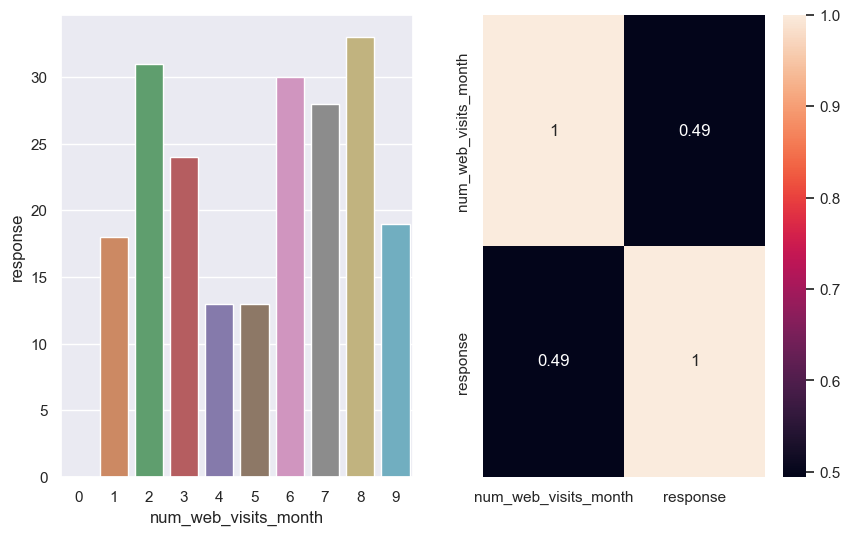

In [63]:
plt.subplot(1, 2, 1)
filter7 = df3[df3.loc[:, 'num_web_visits_month'] <= 9]
aux_7 = filter7[['id','num_web_visits_month', 'response']].groupby('num_web_visits_month').sum().reset_index()
sns.barplot(data=aux_7, x='num_web_visits_month', y='response')

plt.subplot(1, 2, 2)
sns.heatmap(aux_7[['num_web_visits_month', 'response']].corr(method='pearson'), annot=True);

### Hipótese 8 - Clientes com mais compras na web tem maior tendência a aceitar a campanha**

**Falso:** A correlação é a fraca entre essas variáveis, em geral, clientes com número de compras próximos a média tem maior tendência em aceitar a campanha.

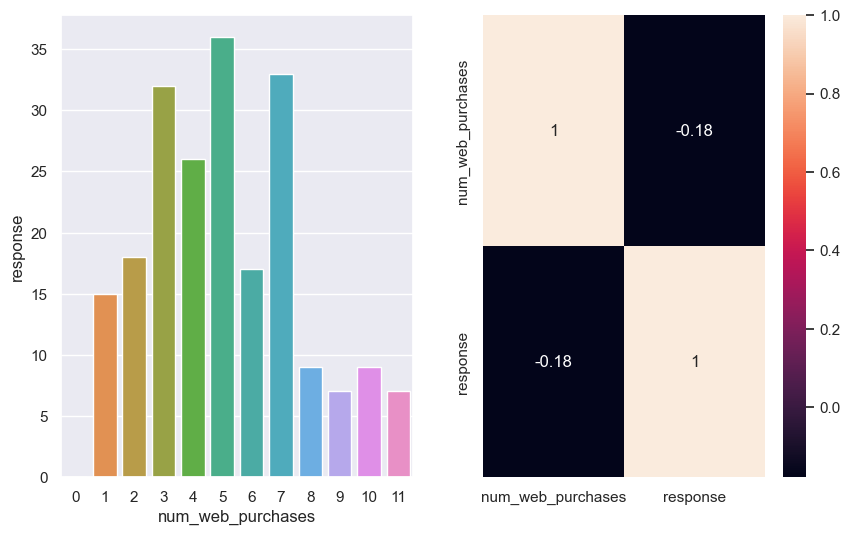

In [66]:
plt.subplot(1, 2, 1)
filter8 = df3[df3.loc[:, 'num_web_purchases'] < 23]
aux_8 = filter8[['id','num_web_purchases', 'response']].groupby('num_web_purchases').sum().reset_index()
sns.barplot(data=aux_8, x='num_web_purchases', y='response')

plt.subplot(1, 2, 2)
sns.heatmap(aux_8[['num_web_purchases', 'response']].corr(method='pearson'), annot=True);

### Hipótese 9 - Clientes mais velhos tem menor tendência a aceitar a campanha**

**Falsa:** Não é possível inferir que a idade influencia no aceite da campanha, a correlação é muito fraca e exite um alto número de aceites em diferentes faixas etárias.

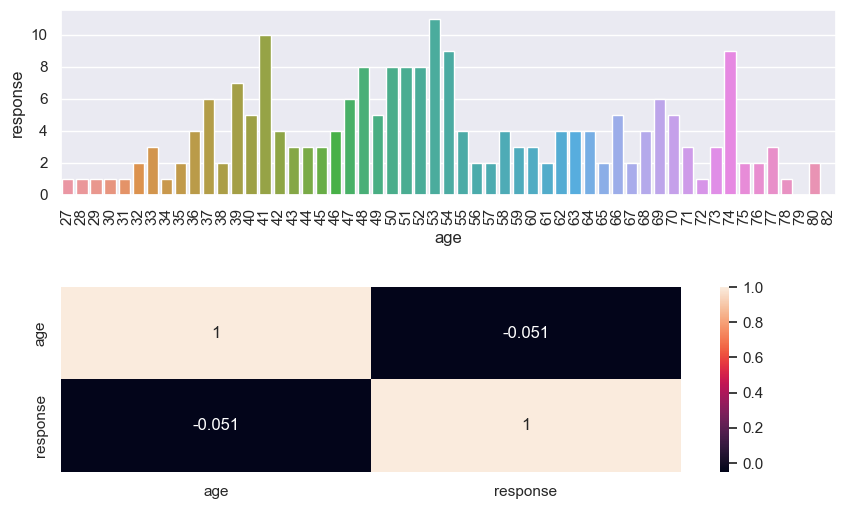

In [77]:
filter9 = df3[df3.loc[:, 'age'] < 85]

plt.subplot(2, 1, 1)
aux9 = filter9[['age', 'response']].groupby('age').sum().reset_index()
sns.barplot(data=aux9, x='age', y='response')
plt.xticks(rotation=90);

plt.subplot(2, 1, 2)
sns.heatmap(aux9[['age', 'response']].corr(method = 'pearson'), annot = True);

plt.subplots_adjust(hspace=0.5)

### Hipótese 10 - Clientes com marital_status igual a Single tem maior tendência a aceitar a campanha**

**Verdadeiro:** Clientes com o marital_status Single tem maior tendência a aceitar a campanha

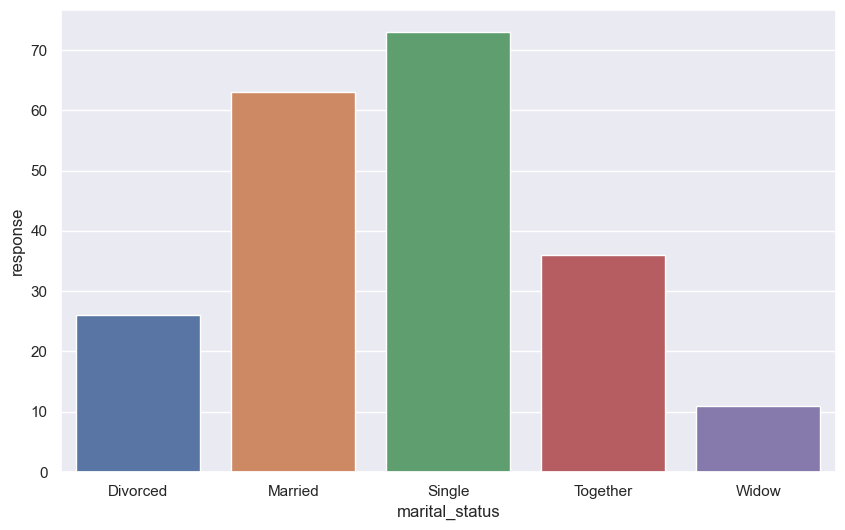

In [83]:
aux10 = df3[['marital_status', 'response']].groupby('marital_status').sum().reset_index()
sns.barplot(data=aux10, x='marital_status', y='response');

### Hipótese 11 - Clientes maior nível de escolaridade tem maior tendência a aceitar a campanha**

**Verdadeoro:** Clientes com maior nível de escolaridade possuem maior tendência em aceitar a campanha.

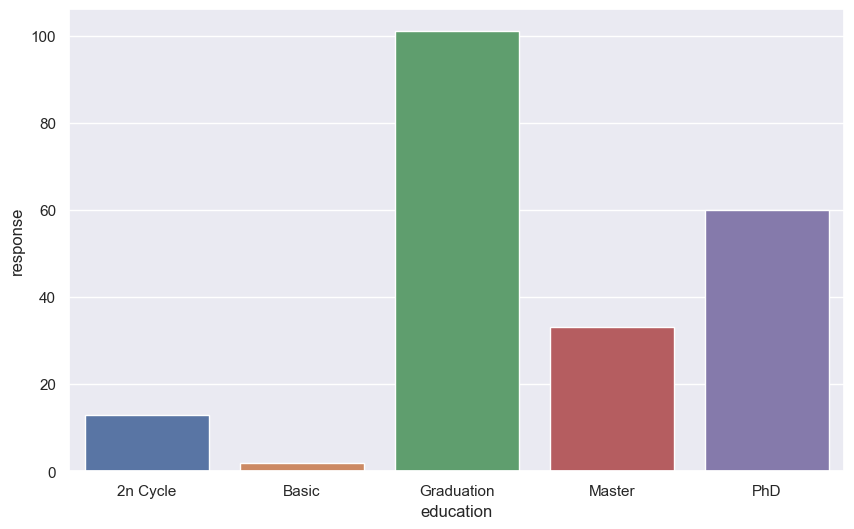

In [87]:
aux11 = df3[['education', 'response']].groupby('education').sum().reset_index()
sns.barplot(data=aux11, x='education', y='response');

### Hipótese 12- Clientes com mais tempo dentro da compania tem maior tendência a aceitar a campanha**

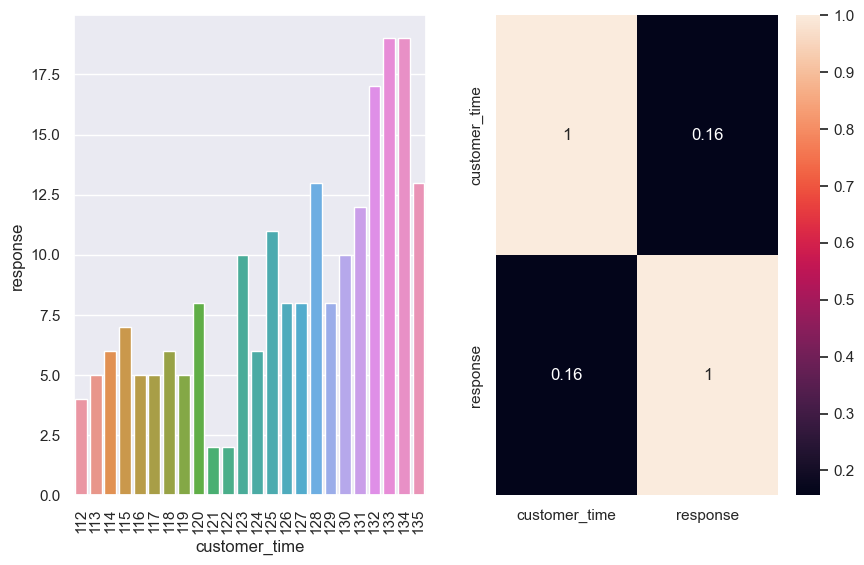

In [94]:
plt.subplot(1, 2, 1)
aux12 = df3[['customer_time', 'response']].groupby('customer_time').sum().reset_index()
sns.barplot(data=aux12, x='customer_time', y='response');
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.heatmap(df3[['customer_time', 'response']].corr(method='pearson'), annot=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)